In [17]:
import xarray as xr
import numpy as np
from scipy.io import loadmat
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seastar as ss
# import seastar.oscar
# import seastar.retrieval
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# import re
# import os
# from scipy import interpolate

In [2]:
# Data load and pre-processing
version = 'v20221104'

oscar_path = "../DATA/OSCAR/" + version + "/matlab-pre-processed/"

file_time_triplets = ss.utils.tools.find_file_triplets(oscar_path)

print('OSCAR L1 processing - version ' + version)
print('-------------------')
print('File path :', oscar_path)
print('-------------------')
for i in range(len(file_time_triplets)):
    print('File index :', i, ',', 'Aquisition time :', file_time_triplets[i][0], ',', 'File list indices :', file_time_triplets[i][1])

# Match tracks in the star pattern from track names and times in the DAR_v6.0 to file aquisition times
star_pattern_tracks={
    'Track_L1' : 0,
    'Track_1a' : 1,
    'Track_2a' : 2,
    'Track_1b' : 3,
    'Track_11' : 4,
    'Track_12' : 5,
    'Track_13' : 6,
    'Track_14' : 7,
    'Track_15' : 8,
    'Track_16' : 9,
    'Track_17' : 10,
    'Track_18' : 11}


OSCAR L1 processing - version v20221104
-------------------
File path : ../DATA/OSCAR/v20221104/matlab-pre-processed/
-------------------
File index : 0 , Aquisition time : 20220522T052218 , File list indices : [2, 24, 26]
File index : 1 , Aquisition time : 20220522T053942 , File list indices : [12, 29, 44]
File index : 2 , Aquisition time : 20220522T054805 , File list indices : [22, 39, 40]
File index : 3 , Aquisition time : 20220522T055458 , File list indices : [3, 16, 36]
File index : 4 , Aquisition time : 20220522T062018 , File list indices : [0, 5, 21]
File index : 5 , Aquisition time : 20220522T062620 , File list indices : [9, 23, 33]
File index : 6 , Aquisition time : 20220522T063239 , File list indices : [6, 17, 35]
File index : 7 , Aquisition time : 20220522T063906 , File list indices : [7, 8, 34]
File index : 8 , Aquisition time : 20220522T064459 , File list indices : [14, 25, 38]
File index : 9 , Aquisition time : 20220522T065108 , File list indices : [11, 30, 31]
File index

In [3]:
# Compute L1C - Sigma0 + RVL
dsl1 = dict()
for track in star_pattern_tracks.keys(): # Loop through star pattern tracks
    file_index = star_pattern_tracks[track]
    ds = ss.utils.readers.load_OSCAR_data(oscar_path, file_time_triplets[file_index][1])
    antenna_ident = ss.utils.tools.identify_antenna_location_from_filename(oscar_path, file_time_triplets[file_index][1])
    ds = ss.oscar.level1.fill_missing_variables(ds, antenna_ident)
    print('Processing file index',file_index)
    # L1 processing
    for i in list(ds.keys()):
        ds[i] = ss.oscar.level1.check_antenna_polarization(ds[i])
        ds[i] = ss.oscar.level1.compute_multilooking_Master_Slave(ds[i], window=7)
#         ds[i]['Baseline'] = ss.oscar.level1.compute_antenna_baseline(0.2)
        ds[i] = ss.oscar.level1.compute_antenna_azimuth_direction(ds[i], antenna=antenna_ident[list(ds.keys()).index(i)])
        ds[i] = ss.oscar.level1.compute_time_lag_Master_Slave(ds[i], options='from_SAR_time')
        ds[i] = ss.oscar.level1.compute_radial_surface_velocity(ds[i])
    #Build L1 dataset
    dsl1[track] = ss.oscar.level1.merge_beams(ds, antenna_ident)


Processing file index 0


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 1


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 2


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 3


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 4


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 5


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 6


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 7


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 8


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 9


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 10


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Processing file index 11


/Users/admartin/opt/anaconda3/envs/CEASELESS_Sentinel1_RVL/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [4]:
# # Compute L2
# ds_l1_star = dict()
# ds_l2_star = dict()
# for track in star_pattern_tracks.keys(): # Loop through star pattern tracks
#     # Generating geophysical data fields for GMF doppler computation, data taken from DAR
#     u10 = 5 # wind speed
#     wind_direction = 25 # wind direction
#     aux = ss.oscar.level1.init_auxiliary(ds_l1_star[track], u10, wind_direction)
#     # Compute RSC
#     dsl1 = ss.oscar.level1.compute_radial_surface_current(dsl1, aux, gmf='mouche12')
#     #L2 Processing
#     # Initialise l2 dataset
#     dsl2=ss.oscar.level1.init_level2(dsl1)
#     # Compute current magnitude and direction
#     dsl2=seastar.retrieval.level2.compute_current_magnitude_and_direction(dsl1, dsl2)
#     # Compute current vectors
#     dsl2['CurrentVectorUComponent'], dsl2['CurrentVectorVComponent'] =\
#     ss.utils.tools.currentVelDir2UV(dsl2['CurrentMagnitude'], dsl2['CurrentDirection'])
#     ds_l2_star[track] = dsl2
#     ds_l1_star[track] = dsl1





In [5]:
dsl1[track]

<xarray.Dataset>
Dimensions:                                 (AntPatternAngles: 201, Antenna: 3, CrossRange: 2452, GBPGridInfo: 9, GPSTime: 1436232, GroundRange: 741, ModelTransformationTagCols: 4, ModelTransformationTagRows: 4)
Coordinates:
  * GBPGridInfo                             (GBPGridInfo) float64 3.31e+05 .....
  * GroundRange                             (GroundRange) float32 1632.0 ... ...
  * CrossRange                              (CrossRange) float64 -1.178e+04 ....
  * AntPatternAngles                        (AntPatternAngles) float64 -90.0 ...
  * GPSTime                                 (GPSTime) float64 2.54e+04 ... 2....
  * Antenna                                 (Antenna) <U4 'Fore' 'Mid' 'Aft'
    latitude                                (CrossRange, GroundRange) float64 ...
    longitude                               (CrossRange, GroundRange) float64 ...
Dimensions without coordinates: ModelTransformationTagCols, ModelTransformationTagRows
Data variables:
    SigmaImageSingleLookRealPart            (Antenna, CrossRange, GroundRange) float64 ...
    SigmaImageSingleLookImaginaryPart       (Antenna, CrossRange, GroundRange) float64 ...
    LatImage                                (Antenna, CrossRange, GroundRange) float64 ...
    LonImage                                (Antenna, CrossRange, GroundRange) float64 ...
    DEMImage                                (Antenna, CrossRange, GroundRange) float32 ...
    OrbLatImage                             (Antenna, CrossRange, GroundRange) float64 ...
    OrbLonImage                             (Antenna, CrossRange, GroundRange) float64 ...
    OrbHeightImage                          (Antenna, CrossRange, GroundRange) float64 ...
    OrbTimeImage                            (Antenna, CrossRange, GroundRange) float64 ...
    OrbitImage                              (Antenna, CrossRange, GroundRange) float32 ...
    OrbitLatitude                           (Antenna, GPSTime) float64 48.31 ...
    OrbitLongitude                          (Antenna, GPSTime) float64 -5.216...
    OrbitHeight                             (Antenna, GPSTime) float64 3.043e...
    OrbitHeading                            (Antenna, GPSTime) float64 225.1 ...
    OrbitRoll                               (Antenna, GPSTime) float64 -0.045...
    OrbitPitch                              (Antenna, GPSTime) float64 0.0312...
    TxElevationGain                         (Antenna, AntPatternAngles) float64 ...
    TxAzimuthGain                           (Antenna, AntPatternAngles) float64 ...
    RxElevationGain                         (Antenna, AntPatternAngles) float64 ...
    RxAzimuthGain                           (Antenna, AntPatternAngles) float64 ...
    ModelTransformationTag                  (Antenna, ModelTransformationTagCols, ModelTransformationTagRows) float64 ...
    StartYear                               (Antenna) int32 2022 2022 2022
    StartMonth                              (Antenna) int32 5 5 5
    StartDay                                (Antenna) int32 22 22 22
    StartHour                               (Antenna) int32 7 7 7
    StartMin                                (Antenna) int32 2 2 2
    StartSec                                (Antenna) float32 59.5159 ... 59....
    FinalYear                               (Antenna) int32 2022 2022 2022
    FinalMonth                              (Antenna) int32 5 5 5
    FinalDay                                (Antenna) int32 22 22 22
    FinalHour                               (Antenna) int32 7 7 7
    FinalMin                                (Antenna) int32 5 5 5
    FinalSec                                (Antenna) float32 58.987324 ... 5...
    TxPolarization                          (Antenna) |S1 b'V' b'V' b'V'
    RxPolarization                          (Antenna) |S1 b'V' b'V' b'V'
    LookDirection                           (Antenna) |S1 b'L' b'L' b'L'
    TxPointEl                               (Antenna) float32 49.0 49.0 49.0
    TxPointAz

In [8]:
# set up a DataSet with median along track for the different Tracks as a new dim
star_tracks_list = ['Track_11', 'Track_12', 'Track_13', 'Track_14', 'Track_15', 'Track_16', 'Track_17', 'Track_18']
vars_list = [
    'RadialSurfaceVelocity',
    'Coherence',
    'Intensity',
    'Interferogram',
]
coords_list = [
    'AntennaAzimuthImage',
    'IncidenceAngleImage',
]
Track_list = [11, 12, 13, 14, 15, 16, 17, 18]

med_list = [None] * len(star_tracks_list)
for ii, track in enumerate(star_tracks_list):
    med_list[ii] = xr.Dataset()
    for var in vars_list + coords_list:
        med_list[ii][var] = dsl1[track][var].median(dim='CrossRange')
    med_list[ii] = med_list[ii].set_coords(coords_list)
med = xr.concat(med_list, dim='Track')
med['Track'] = Track_list

# Radial Velocity

In [ ]:
# Plot RVL as function of Antenna Azimuth for all (selected) incidence angle
med.sel(Antenna=['Fore', 'Aft'])\
    .isel(GroundRange=slice(7,500))\
    .plot.scatter(
        x='AntennaAzimuthImage', 
        y='RadialSurfaceVelocity', 
        hue='Track',
        hue_style='discrete',
)
plt.grid()
plt.legend()
plt.ylim([-1,1])

In [ ]:
# Intensity vs Azimuth at given Incidence Angle; Fore + Aft
inci_index = np.arange(20,600,100)
for index in inci_index:
    inci_round = np.round(
        med.IncidenceAngleImage.sel(Track=13, Antenna='Fore').isel(GroundRange=index).data
        ,0)
    inci_str = str(inci_round) + '° inci angle'
    plt.figure()
    med.sel(Antenna=['Fore', 'Aft'])\
        .isel(GroundRange=index)\
        .plot.scatter(
            x='AntennaAzimuthImage', 
            y='RadialSurfaceVelocity', 
            hue='Track',
            hue_style='discrete',
    )
    plt.title(inci_str)
    plt.grid()
    plt.legend()
    plt.ylim([-1,1])

In [ ]:
# Radial Velocity vs Azimuth given Incidence Angle; Fore / Aft
inci_index = np.arange(20,600,100)
for index in inci_index:
    inci_round = np.round(
        med.IncidenceAngleImage.sel(Track=13, Antenna='Fore').isel(GroundRange=index).data
        ,0)
    inci_str = str(inci_round) + '° inci angle'
    plt.figure()
    med.sel(Antenna=['Fore', 'Aft'])\
        .isel(GroundRange=index)\
        .plot.scatter(
            x='AntennaAzimuthImage', 
            y='RadialSurfaceVelocity', 
            hue='Track',
            hue_style='discrete',
            col='Antenna',
    )
#     plt.title(inci_str)
#     plt.grid()
#     plt.legend()
#     plt.ylim([-1,1])

# Sigma0 - Intensity

In [ ]:
# Intensity vs Azimuth given Incidence Angle; Fore + Aft
inci_index = np.arange(20,600,100)
for index in inci_index:
    inci_round = np.round(
        med.IncidenceAngleImage.sel(Track=13, Antenna='Fore').isel(GroundRange=index).data
        ,0)
    inci_str = str(inci_round) + '° inci angle'
    plt.figure()
    (10*np.log10(med)).sel(Antenna=['Fore', 'Aft'])\
        .isel(GroundRange=index)\
        .plot.scatter(
            x='AntennaAzimuthImage', 
            y='Intensity', 
            hue='Track',
            hue_style='discrete',
    )
    plt.title(inci_str)
    plt.grid()
#     plt.legend()
#     plt.ylim([-1,1])

In [ ]:
# Intensity vs Azimuth given Incidence Angle
inci_index = np.arange(20,600,100)
for index in inci_index:
    inci_round = np.round(
        med.IncidenceAngleImage.sel(Track=13, Antenna='Fore').isel(GroundRange=index).data
        ,0)
    inci_str = str(inci_round) + '° inci angle'
    plt.figure()
    (10*np.log10(med)).sel(Antenna=['Fore', 'Aft'])\
        .isel(GroundRange=index)\
        .plot.scatter(
            x='AntennaAzimuthImage', 
            y='Intensity', 
            hue='Track',
            hue_style='discrete',
            col='Antenna',
    )
#     plt.title(inci_str)
#     plt.grid()
#     plt.legend()
#     plt.ylim([-1,1])

# Coherence

In [ ]:
# Coherence vs Azimuth given Incidence Angle; Fore + Aft
inci_index = np.arange(20,600,100)
ylim_list = [[0.8, 1],
             [0.8, 1],
             [0.8, 1],
             [0.4, 1],
             [0.4, 1],
             [0.2, 1]]
for ii, index in enumerate(inci_index):
    inci_round = np.round(
        med.IncidenceAngleImage.sel(Track=13, Antenna='Fore').isel(GroundRange=index).data
        ,0)
    inci_str = str(inci_round) + '° inci angle'
    plt.figure()
    med.sel(Antenna=['Fore', 'Aft'])\
        .isel(GroundRange=index)\
        .plot.scatter(
            x='AntennaAzimuthImage', 
            y='Coherence', 
            hue='Track',
            hue_style='discrete',
    )
    plt.title(inci_str)
    plt.grid()
#     plt.legend()
    plt.ylim(ylim_list[ii])

In [ ]:
# Intensity vs Azimuth given Incidence Angle
inci_index = np.arange(20,600,100)
for index in inci_index:
    inci_round = np.round(
        med.IncidenceAngleImage.sel(Track=13, Antenna='Fore').isel(GroundRange=index).data
        ,0)
    inci_str = str(inci_round) + '° inci angle'
    plt.figure()
    med.sel(Antenna=['Fore', 'Aft'])\
        .isel(GroundRange=index)\
        .plot.scatter(
            x='AntennaAzimuthImage', 
            y='Coherence', 
            hue='Track',
            hue_style='discrete',
            col='Antenna',
    )
#     plt.title(inci_str)
#     plt.grid()
#     plt.legend()
#     plt.ylim([-1,1])

# Interferogram

In [ ]:
# Interferogram vs Azimuth at given Incidence Angle; Fore + Aft
inci_index = np.arange(20,600,100)
for index in inci_index:
    inci_round = np.round(
        med.IncidenceAngleImage.sel(Track=13, Antenna='Fore').isel(GroundRange=index).data
        ,0)
    inci_str = str(inci_round) + '° inci angle'
    plt.figure()
    med.sel(Antenna=['Fore', 'Aft'])\
        .isel(GroundRange=index)\
        .plot.scatter(
            x='AntennaAzimuthImage', 
            y='Interferogram', 
            hue='Track',
            hue_style='discrete',
    )
    plt.title(inci_str)
    plt.grid()
    plt.legend()
    plt.ylim([-0.3,.3])

In [ ]:
# Interferogram vs Azimuth given Incidence Angle; Fore / Aft
inci_index = np.arange(20,600,100)
for index in inci_index:
    inci_round = np.round(
        med.IncidenceAngleImage.sel(Track=13, Antenna='Fore').isel(GroundRange=index).data
        ,0)
    inci_str = str(inci_round) + '° inci angle'
    plt.figure()
    med.sel(Antenna=['Fore', 'Aft'])\
        .isel(GroundRange=index)\
        .plot.scatter(
            x='AntennaAzimuthImage', 
            y='Interferogram', 
            hue='Track',
            hue_style='discrete',
            col='Antenna',
    )
#     plt.title(inci_str)
#     plt.grid()
#     plt.legend()
#     plt.ylim([-1,1])

# Ouessant

In [44]:
dsl1[track]

<xarray.Dataset>
Dimensions:                                 (AntPatternAngles: 201, Antenna: 3, CrossRange: 2780, GBPGridInfo: 9, GPSTime: 1661184, GroundRange: 741, ModelTransformationTagCols: 4, ModelTransformationTagRows: 4)
Coordinates:
  * GBPGridInfo                             (GBPGridInfo) float64 3.397e+05 ....
  * GroundRange                             (GroundRange) float32 1616.0 ... ...
  * CrossRange                              (CrossRange) float64 -1.312e+04 ....
  * AntPatternAngles                        (AntPatternAngles) float64 -90.0 ...
  * GPSTime                                 (GPSTime) float64 2.13e+04 ... 2....
  * Antenna                                 (Antenna) <U4 'Mid' 'Aft' 'Fore'
    latitude                                (CrossRange, GroundRange) float64 ...
    longitude                               (CrossRange, GroundRange) float64 ...
Dimensions without coordinates: ModelTransformationTagCols, ModelTransformationTagRows
Data variables:
    SigmaImageSingleLookRealPart            (Antenna, CrossRange, GroundRange) float64 ...
    SigmaImageSingleLookImaginaryPart       (Antenna, CrossRange, GroundRange) float64 ...
    LatImage                                (Antenna, CrossRange, GroundRange) float64 ...
    LonImage                                (Antenna, CrossRange, GroundRange) float64 ...
    DEMImage                                (Antenna, CrossRange, GroundRange) float32 ...
    OrbLatImage                             (Antenna, CrossRange, GroundRange) float64 ...
    OrbLonImage                             (Antenna, CrossRange, GroundRange) float64 ...
    OrbHeightImage                          (Antenna, CrossRange, GroundRange) float64 ...
    OrbTimeImage                            (Antenna, CrossRange, GroundRange) float64 ...
    CalImage                                (Antenna, CrossRange, GroundRange) float32 ...
    OrbitImage                              (Antenna, CrossRange, GroundRange) float32 ...
    OrbitLatitude                           (Antenna, GPSTime) float64 48.51 ...
    OrbitLongitude                          (Antenna, GPSTime) float64 -5.17 ...
    OrbitHeight                             (Antenna, GPSTime) float64 3.054e...
    OrbitHeading                            (Antenna, GPSTime) float64 539.6 ...
    OrbitRoll                               (Antenna, GPSTime) float64 -0.077...
    OrbitPitch                              (Antenna, GPSTime) float64 -0.031...
    TxElevationGain                         (Antenna, AntPatternAngles) float64 ...
    TxAzimuthGain                           (Antenna, AntPatternAngles) float64 ...
    RxElevationGain                         (Antenna, AntPatternAngles) float64 ...
    RxAzimuthGain                           (Antenna, AntPatternAngles) float64 ...
    ModelTransformationTag                  (Antenna, ModelTransformationTagCols, ModelTransformationTagRows) float64 ...
    StartYear                               (Antenna) int32 2022 2022 2022
    StartMonth                              (Antenna) int32 5 5 5
    StartDay                                (Antenna) int32 22 22 22
    StartHour                               (Antenna) int32 5 5 5
    StartMin                                (Antenna) int32 54 54 54
    StartSec                                (Antenna) float32 40.4852 ... 40....
    FinalYear                               (Antenna) int32 2022 2022 2022
    FinalMonth                              (Antenna) int32 5 5 5
    FinalDay                                (Antenna) int32 22 22 22
    FinalHour                               (Antenna) int32 5 5 5
    FinalMin                                (Antenna) int32 58 58 58
    FinalSec                                (Antenna) float32 8.0666275 ... 8...
    TxPolarization                          (Antenna) |S1 b'V' b'V' b'V'
    RxPolarization                          (Antenna) |S1 b'V' b'V' b'V'
    LookDirection                           (Antenna) |S1 b'L' b'L

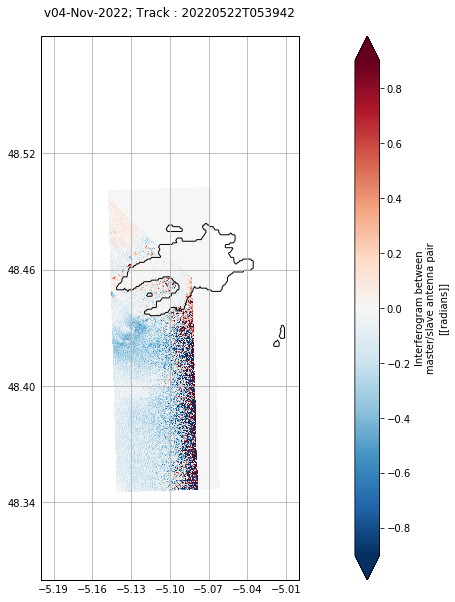

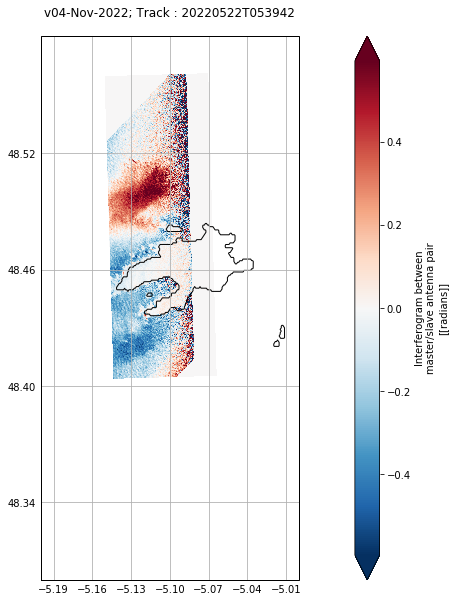

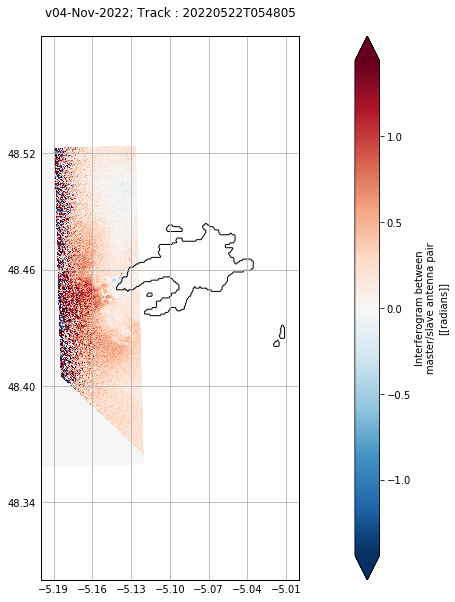

In [ ]:
ouessant_tracks = ['Track_1a', 'Track_2a', 'Track_1b']

for track in ouessant_tracks:
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator())
    dsl1[track].sel(Antenna='Fore')\
        .Interferogram.plot(
            y='latitude',
            x='longitude',
            robust=True,
            transform=ccrs.PlateCarree()
    )
    plt.title(
        'v' + dsl1[track].attrs['History'][:11]
         + '; ' + dsl1[track].Title
        , y=1.025)
    gl=ax.gridlines(draw_labels=True)
    gl.xlabels_top=False
    gl.ylabels_right=False
    ax.set_extent([-5.2, -5.0, 48.30, 48.58], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.GSHHSFeature(scale='full'))
    
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator())
    dsl1[track].sel(Antenna='Aft')\
        .Interferogram.plot(
            y='latitude',
            x='longitude',
            robust=True,
            transform=ccrs.PlateCarree()
    )
    plt.title(
        'v' + dsl1[track].attrs['History'][:11]
        + '; ' + dsl1[track].Title
        , y=1.025)
    gl=ax.gridlines(draw_labels=True)
    gl.xlabels_top=False
    gl.ylabels_right=False
    ax.set_extent([-5.2, -5.0, 48.30, 48.58], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.GSHHSFeature(scale='full'))


# Land

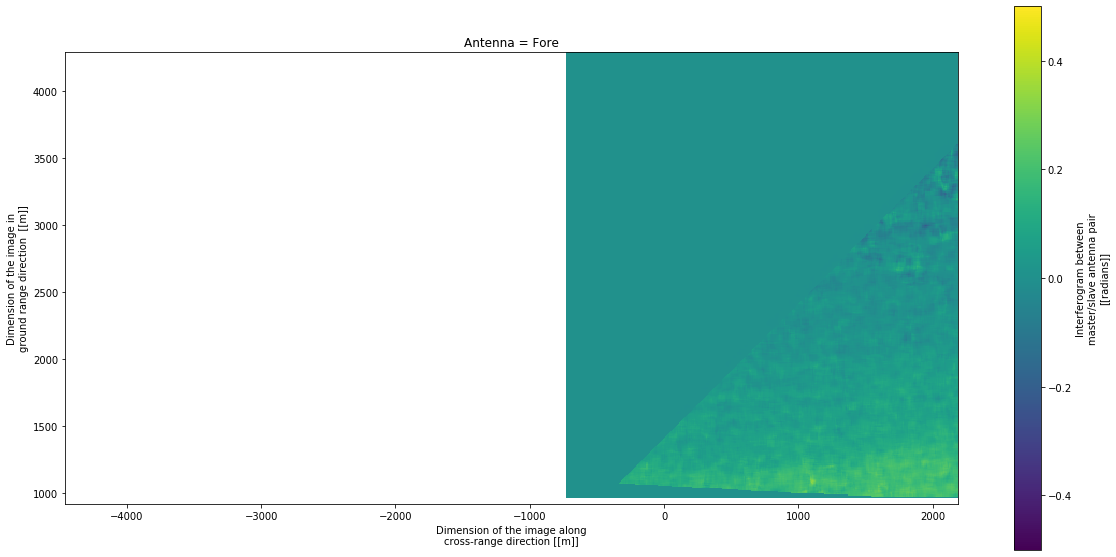

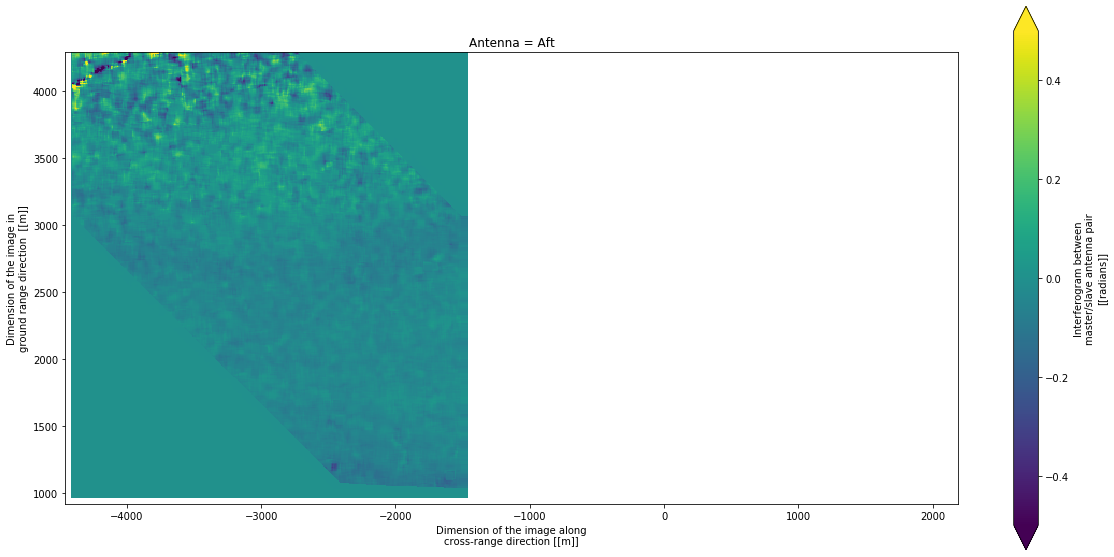

In [43]:
fig = plt.figure(figsize=(20, 10))
ax = dsl1['Track_L1'].sel(Antenna='Fore')\
    .Interferogram.plot(
        y='GroundRange', x='CrossRange',
        vmin=-0.5, vmax=0.5,

)
ax.axes.set_aspect('equal')

fig = plt.figure(figsize=(20, 10))
ax = dsl1['Track_L1'].sel(Antenna='Aft')\
    .Interferogram.plot(
        y='GroundRange', x='CrossRange',
        vmin=-0.5, vmax=0.5,

)
ax.axes.set_aspect('equal')

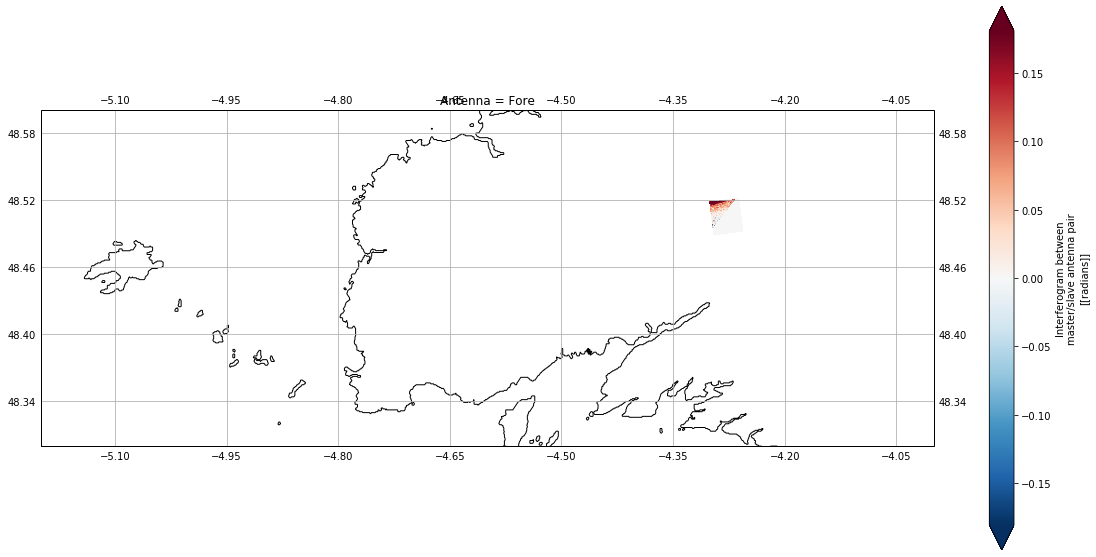

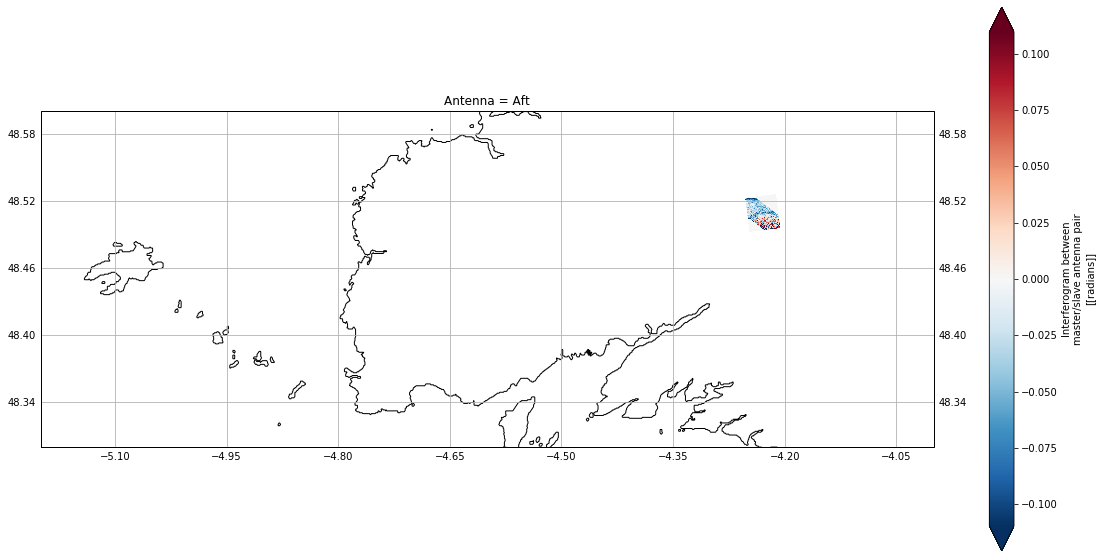

In [52]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator())
dsl1['Track_L1'].sel(Antenna='Fore')\
    .Interferogram.plot(
        y='latitude',
        x='longitude',
        robust=True,
        transform=ccrs.PlateCarree()
)
gl=ax.gridlines(draw_labels=True)
gl.xlabels_top=False
gl.ylabels_right=False
ax.set_extent([-5.2, -4.0, 48.30, 48.6], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.GSHHSFeature())

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator())
dsl1['Track_L1'].sel(Antenna='Aft')\
    .Interferogram.plot(
        y='latitude',
        x='longitude',
        robust=True,
        transform=ccrs.PlateCarree()
)
gl=ax.gridlines(draw_labels=True)
gl.xlabels_top=False
gl.ylabels_right=False
ax.set_extent([-5.2, -4.0, 48.30, 48.6], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.GSHHSFeature())

# Pickle

In [151]:
import pickle
import bz2
import datetime as dt

In [149]:
today = dt.date.today().strftime("%Y%m%d")

In [150]:
out_pickle_name = 'trash' + today

In [154]:
with bz2.BZ2File(out_pickle_name + '.pbz2', 'w') as sf: pickle.dump(dsl1['Track_11'], sf)